<a href="https://colab.research.google.com/github/artigenius/homeworke/blob/main/texts_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сентимент анализ текстов песен Radiohead



# 1 Введение

**Цель проекта**: произвести сентимент анализ текстов песен Rediohead из всех вышедших альбомов группы и визуализировать полученный результат

**Задачи**:
- Найти датасет, содержащий всю необходимую информацию
- Произвести предварительную чистку данных
- Произвести токкенизацию и "чистку" текстовых данных
- Провести sentiment analyse текстов
- Визуализировать полученные данные


# 2 Датасета

- Выбрать, описать и загрузить источник используемых данных

Готовый датасет был выгружен с [сайта](https://data.world/rcharlie/gloom-index-of-radiohead-songs).
Изначальной идеей было провести самостоятельный сбор данных с помощью API Genius, но в ходе работы данных метод оказался менее результативным и вызывал больше проблем, чем давал результатов. Поэтому было принято решение анализировать готовый сет данных.

Загрузим необходимый файл в личный репозиторий гугл-диска и подключим его к коллабу, чтобы быстро подгружать любой необходимый нам файл.

In [10]:
# загружаем датасет
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# загружаем библиотеки для анализа даты
import pandas as pd
import numpy as np

# загрузим библиотеки для визуализации полученных данных
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [66]:
df = pd.read_csv('/content/drive/MyDrive/radiohead.csv', encoding='cp1252')
df.head()

,track_name,valence,duration_ms,lyrics,album_name,album_release_year,album_img,pct_sad,word_count,lyrical_density,gloom_index
0,You,0.305,208667,you are the sun and moon and stars are you and...,Pablo Honey,1993,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,0.0000,19,0.091054,50.39
1,Creep,0.096,238640,when you were here before couldn't look you in...,Pablo Honey,1993,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,0.0784,51,0.213711,22.60
2,How Do You?,0.264,132173,he's bitter and twisted he knows what he wants...,Pablo Honey,1993,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,0.0952,21,0.158883,36.56
3,Stop Whispering,0.279,325627,and the wise man said i don't want to hear you...,Pablo Honey,1993,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,0.0435,46,0.141266,43.48
4,Thinking About You,0.419,161533,been thinking about you your records are here ...,Pablo Honey,1993,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,0.0000,39,0.241437,60.80


In [67]:
# проверяем какой тип данных находится в каждом столбце
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_name          101 non-null    object 
 1   valence             101 non-null    float64
 2   duration_ms         101 non-null    int64  
 3   lyrics              98 non-null     object 
 4   album_name          101 non-null    object 
 5   album_release_year  101 non-null    int64  
 6   album_img           101 non-null    object 
 7   pct_sad             101 non-null    float64
 8   word_count          101 non-null    int64  
 9   lyrical_density     101 non-null    float64
 10  gloom_index         101 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 8.8+ KB


In [68]:
# очистим данные от пустых строк, в которых нет текста, так как только в столбце lyrics отсутствуют данные
df_nan = df.dropna()
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 100
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_name          98 non-null     object 
 1   valence             98 non-null     float64
 2   duration_ms         98 non-null     int64  
 3   lyrics              98 non-null     object 
 4   album_name          98 non-null     object 
 5   album_release_year  98 non-null     int64  
 6   album_img           98 non-null     object 
 7   pct_sad             98 non-null     float64
 8   word_count          98 non-null     int64  
 9   lyrical_density     98 non-null     float64
 10  gloom_index         98 non-null     float64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.2+ KB


In [69]:
# так как нам не нужны некоторые данные, мы удалим столбцы с ними
df_nan.drop(['valence', 'duration_ms', 'album_img', 'pct_sad', 'word_count', 'lyrical_density', 'gloom_index'], axis = 1, inplace = True)
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 100
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   track_name          98 non-null     object
 1   lyrics              98 non-null     object
 2   album_name          98 non-null     object
 3   album_release_year  98 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 3.8+ KB


<ipython-input-69-5a3ae225a2c0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Sentiment analysis

In [62]:
# загрузим библиотеки для nlp
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [70]:
# let's удалим ненужные символы из текста
import string
def text_cleaned(text):
  text = text.str.replace('[\(\[].*?[\)\]]', '')
  text = text.str.replace('\n', '')
  text = text.str.replace('[{}]'.format(string.punctuation), '')
  text = text.str.lower()
  return text

# запишем очищенный текст в новую колонку lyrics_cleaned
df_nan.loc[:, 'lyrics_no_punkt'] = text_cleaned(df_nan.loc[:, 'lyrics'])
df_nan

<ipython-input-70-44f118815a69>:4: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-70-44f118815a69>:6: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-70-44f118815a69>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,track_name,lyrics,album_name,album_release_year,lyrics_no_punkt
0,You,you are the sun and moon and stars are you and...,Pablo Honey,1993,you are the sun and moon and stars are you and...
1,Creep,when you were here before couldn't look you in...,Pablo Honey,1993,when you were here before couldnt look you in ...
2,How Do You?,he's bitter and twisted he knows what he wants...,Pablo Honey,1993,hes bitter and twisted he knows what he wants ...
3,Stop Whispering,and the wise man said i don't want to hear you...,Pablo Honey,1993,and the wise man said i dont want to hear your...
4,Thinking About You,been thinking about you your records are here ...,Pablo Honey,1993,been thinking about you your records are here ...
...,...,...,...,...,...
96,Identikit,repeated background hook a moon shaped pool da...,A Moon Shaped Pool,2016,repeated background hook a moon shaped pool da...
97,The Numbers,it holds us like a phantom it touches like a b...,A Moon Shaped Pool,2016,it holds us like a phantom it touches like a b...
98,Present Tense,this dance this dance is like a weapon is like...,A Moon Shaped Pool,2016,this dance this dance is like a weapon is like...
99,Tinker Tailor Soldier Sailor Rich Man Poor Man...,all the holes at once are coming alive set fre...,A Moon Shaped Pool,2016,all the holes at once are coming alive set fre...


In [71]:
# пришло время удалить из текста все стоп-слова и музыкальный слэнг
def remove_stopwords(text):
    clean_text = list()
    nltk.download('punkt')
    nltk.download('stopwords')

    words =["yeah","ya","na","wan","uh","gon","ima","mm","uhhuh","bout","em","nigga","niggas","got","ta","lil","ol","hey",
          "oooh","ooh","oh","youre","dont","im","youve","ive","theres","ill","yaka","lalalala","la","da","di","yuh",
          "shawty","oohooh","shoorah","mmmmmm","ook","bidibambambambam","shh","bro","ho","aint","cant","know","bambam",
          "shitll","tonka"]
    ignore = (stopwords.words('english') + words)

    for i in text:
        words = nltk.word_tokenize(i) # токенизируем каждое слово в тектсе
        for element in ignore: # из токенизированного текста возвращаем список 'чистого текста'
            words = list(filter(lambda x: x!= element and len(x) > 1, words))
        lyric = " ".join(words)
        clean_text.append(lyric)

    return clean_text

# применим функицю к колонке с текстом без пунктуации
df_nan['lyrics_cleaned'] = remove_stopwords(df_nan['lyrics_no_punkt'])
df_nan.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-71-0356b50e3811>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,track_name,lyrics,album_name,album_release_year,lyrics_no_punkt,lyrics_cleaned
0,You,you are the sun and moon and stars are you and...,Pablo Honey,1993,you are the sun and moon and stars are you and...,sun moon stars could never run away try workin...
1,Creep,when you were here before couldn't look you in...,Pablo Honey,1993,when you were here before couldnt look you in ...,couldnt look eye like angel skin makes cry flo...
2,How Do You?,he's bitter and twisted he knows what he wants...,Pablo Honey,1993,hes bitter and twisted he knows what he wants ...,hes bitter twisted knows wants wants loved wan...
3,Stop Whispering,and the wise man said i don't want to hear you...,Pablo Honey,1993,and the wise man said i dont want to hear your...,wise man said want hear voice thin man said wa...
4,Thinking About You,been thinking about you your records are here ...,Pablo Honey,1993,been thinking about you your records are here ...,thinking records eyes wall teeth still one sta...


In [72]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

comp_score = [] # общий результат сентимент-анализа
sentiment = [] # финальный "вердикт"

for i in df_nan.loc[:,'lyrics_cleaned']:
    sentiment.append(sia.polarity_scores(i))

# Compound score is the sum of positive, negative & neutral scores
# which is then normalized between -1(most extreme negative) and +1 (most extreme positive).
df_nan.loc[:,'sent_scores'] = sentiment
df_nan.loc[:,'comp_score'] = df_nan.loc[:,'sent_scores'].apply(lambda x: x['compound'])
df_nan.loc[:,'sentiment'] = df_nan.loc[:,'comp_score'].apply(lambda x: 'Positive' if x>=0.5 else 'Negative' if x<=-0.5 else 'Neutral')
df_nan

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-72-d41b8035e9d9>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-d41b8035e9d9>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-d41b8035e9d9>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,track_name,lyrics,album_name,album_release_year,lyrics_no_punkt,lyrics_cleaned,sent_scores,comp_score,sentiment
0,You,you are the sun and moon and stars are you and...,Pablo Honey,1993,you are the sun and moon and stars are you and...,sun moon stars could never run away try workin...,"{'neg': 0.28, 'neu': 0.613, 'pos': 0.107, 'com...",-0.7845,Negative
1,Creep,when you were here before couldn't look you in...,Pablo Honey,1993,when you were here before couldnt look you in ...,couldnt look eye like angel skin makes cry flo...,"{'neg': 0.268, 'neu': 0.329, 'pos': 0.403, 'co...",0.8855,Positive
2,How Do You?,he's bitter and twisted he knows what he wants...,Pablo Honey,1993,hes bitter and twisted he knows what he wants ...,hes bitter twisted knows wants wants loved wan...,"{'neg': 0.378, 'neu': 0.379, 'pos': 0.243, 'co...",-0.8176,Negative
3,Stop Whispering,and the wise man said i don't want to hear you...,Pablo Honey,1993,and the wise man said i dont want to hear your...,wise man said want hear voice thin man said wa...,"{'neg': 0.217, 'neu': 0.661, 'pos': 0.122, 'co...",-0.5560,Negative
4,Thinking About You,been thinking about you your records are here ...,Pablo Honey,1993,been thinking about you your records are here ...,thinking records eyes wall teeth still one sta...,"{'neg': 0.029, 'neu': 0.595, 'pos': 0.375, 'co...",0.9822,Positive
...,...,...,...,...,...,...,...,...,...
96,Identikit,repeated background hook a moon shaped pool da...,A Moon Shaped Pool,2016,repeated background hook a moon shaped pool da...,repeated background hook moon shaped pool danc...,"{'neg': 0.376, 'neu': 0.494, 'pos': 0.13, 'com...",-0.9952,Negative
97,The Numbers,it holds us like a phantom it touches like a b...,A Moon Shaped Pool,2016,it holds us like a phantom it touches like a b...,holds us like phantom touches like breeze shin...,"{'neg': 0.035, 'neu': 0.701, 'pos': 0.264, 'co...",0.9531,Positive
98,Present Tense,this dance this dance is like a weapon is like...,A Moon Shaped Pool,2016,this dance this dance is like a weapon is like...,dance dance like weapon like weapon selfdefenc...,"{'neg': 0.47, 'neu': 0.376, 'pos': 0.153, 'com...",-0.9771,Negative
99,Tinker Tailor Soldier Sailor Rich Man Poor Man...,all the holes at once are coming alive set fre...,A Moon Shaped Pool,2016,all the holes at once are coming alive set fre...,holes coming alive set free sight mind lonely ...,"{'neg': 0.101, 'neu': 0.669, 'pos': 0.229, 'co...",0.7430,Positive


In [55]:
import plotly.express as px
import plotly.io as pio

альбом и сентимент

In [56]:
song_sent = pd.DataFrame(df_nan.groupby(['album_release_year','sentiment'])['track_name'].count())
song_sent.columns = ['SongCount']

song_sent = song_sent.reset_index()
song_sent = song_sent.sort_values(by=['album_release_year','SongCount'], ascending = False)

fig = px.bar(song_sent, x = 'album_release_year', y = 'SongCount', color = 'sentiment',
             labels = {'y':'No of songs','x':'Sentiment'},
             title = 'Top 100 Song Sentiments',
             height = 400, width = 900)
fig.show()

In [57]:
data = pd.DataFrame(df_nan.value_counts(['album_release_year','sentiment']),columns = ['NoOfSongs']).reset_index()
data = data.sort_values(by="album_release_year")
fig = px.line(data, x="album_release_year", y="NoOfSongs", color='sentiment')
fig.show()

In [58]:
# Filtering songs with postive, negative and neutral sentiments seperately
pos_sent = df_nan[df_nan['sentiment']=='Positive']
neg_sent = df_nan[df_nan['sentiment']=='Negative']

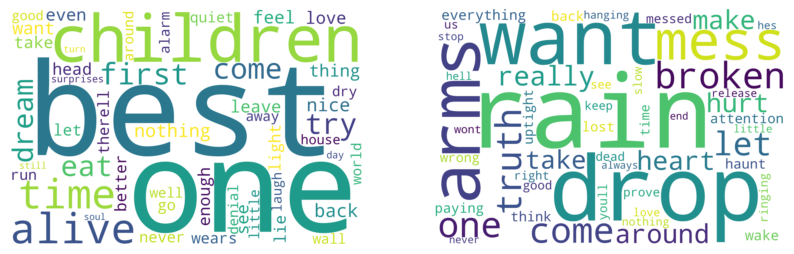

In [60]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
wordcloud1 = WordCloud(collocations = False,
                      background_color = 'white',max_words = 50,
                      width=3000, height=2000).generate(' '.join(pos_sent['lyrics_cleaned']))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")

plt.subplot(1,2,2)
wordcloud2 = WordCloud(collocations = False,
                      background_color = 'white',max_words = 50,
                      width=3000, height=2000).generate(' '.join(neg_sent['lyrics_cleaned']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

ValueError: ignored

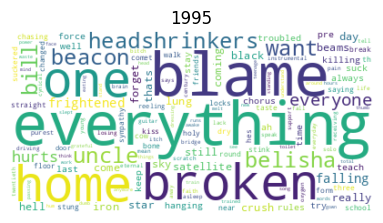

In [61]:
index = 1

year = [i for i in range(1995,2015)]
plt.figure(figsize=(15,15))
for y in year:
    d = neg_sent[neg_sent['album_release_year']==y]
    wordcloud = WordCloud(collocations = False,
                          background_color = 'white').generate(' '.join(d['lyrics_cleaned']))
    plt.subplot(4,3,index)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(y)
    index+=1
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()